In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1222,ham,Teach me apps da. When you come to college.,NaN,NaN,NaN
4087,ham,He needs to stop going to bed and make with th...,NaN,NaN,NaN
5258,ham,1 in cbe. 2 in chennai.,NaN,NaN,NaN
28,ham,"I'm back &amp; we're packing the car now, I'll...",NaN,NaN,NaN
2339,ham,Cheers for the message Zogtorius. IåÕve been s...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
1078,ham,Convey my regards to him
4338,ham,Just got outta class gonna go gym.
3550,ham,I love you both too :-)
985,ham,Carlos says he'll be at mu in &lt;#&gt; minutes
3677,spam,Promotion Number: 8714714 - UR awarded a City ...


In [8]:
#renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4763,ham,Hi.:)technical support.providing assistance to...
111,ham,Going for dinner.msg you after.
391,ham,Hey so this sat are we going for the intro pil...
5105,ham,I wnt to buy a BMW car urgently..its vry urgen...
480,ham,"Almost there, see u in a sec"


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missig values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#remove duplicate
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

# EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

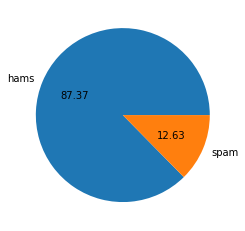

In [19]:
plt.pie(df['target'].value_counts(),labels=['hams','spam'],autopct='%0.2f')
plt.show()

In [20]:
#data is imbalance

In [21]:
import nltk

In [22]:
df['num_character']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
# num of sentences
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [29]:
#ham
df[df['target'] == 0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#spam
df[df['target'] == 1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [31]:
import seaborn as sns

<AxesSubplot:xlabel='num_character', ylabel='Count'>

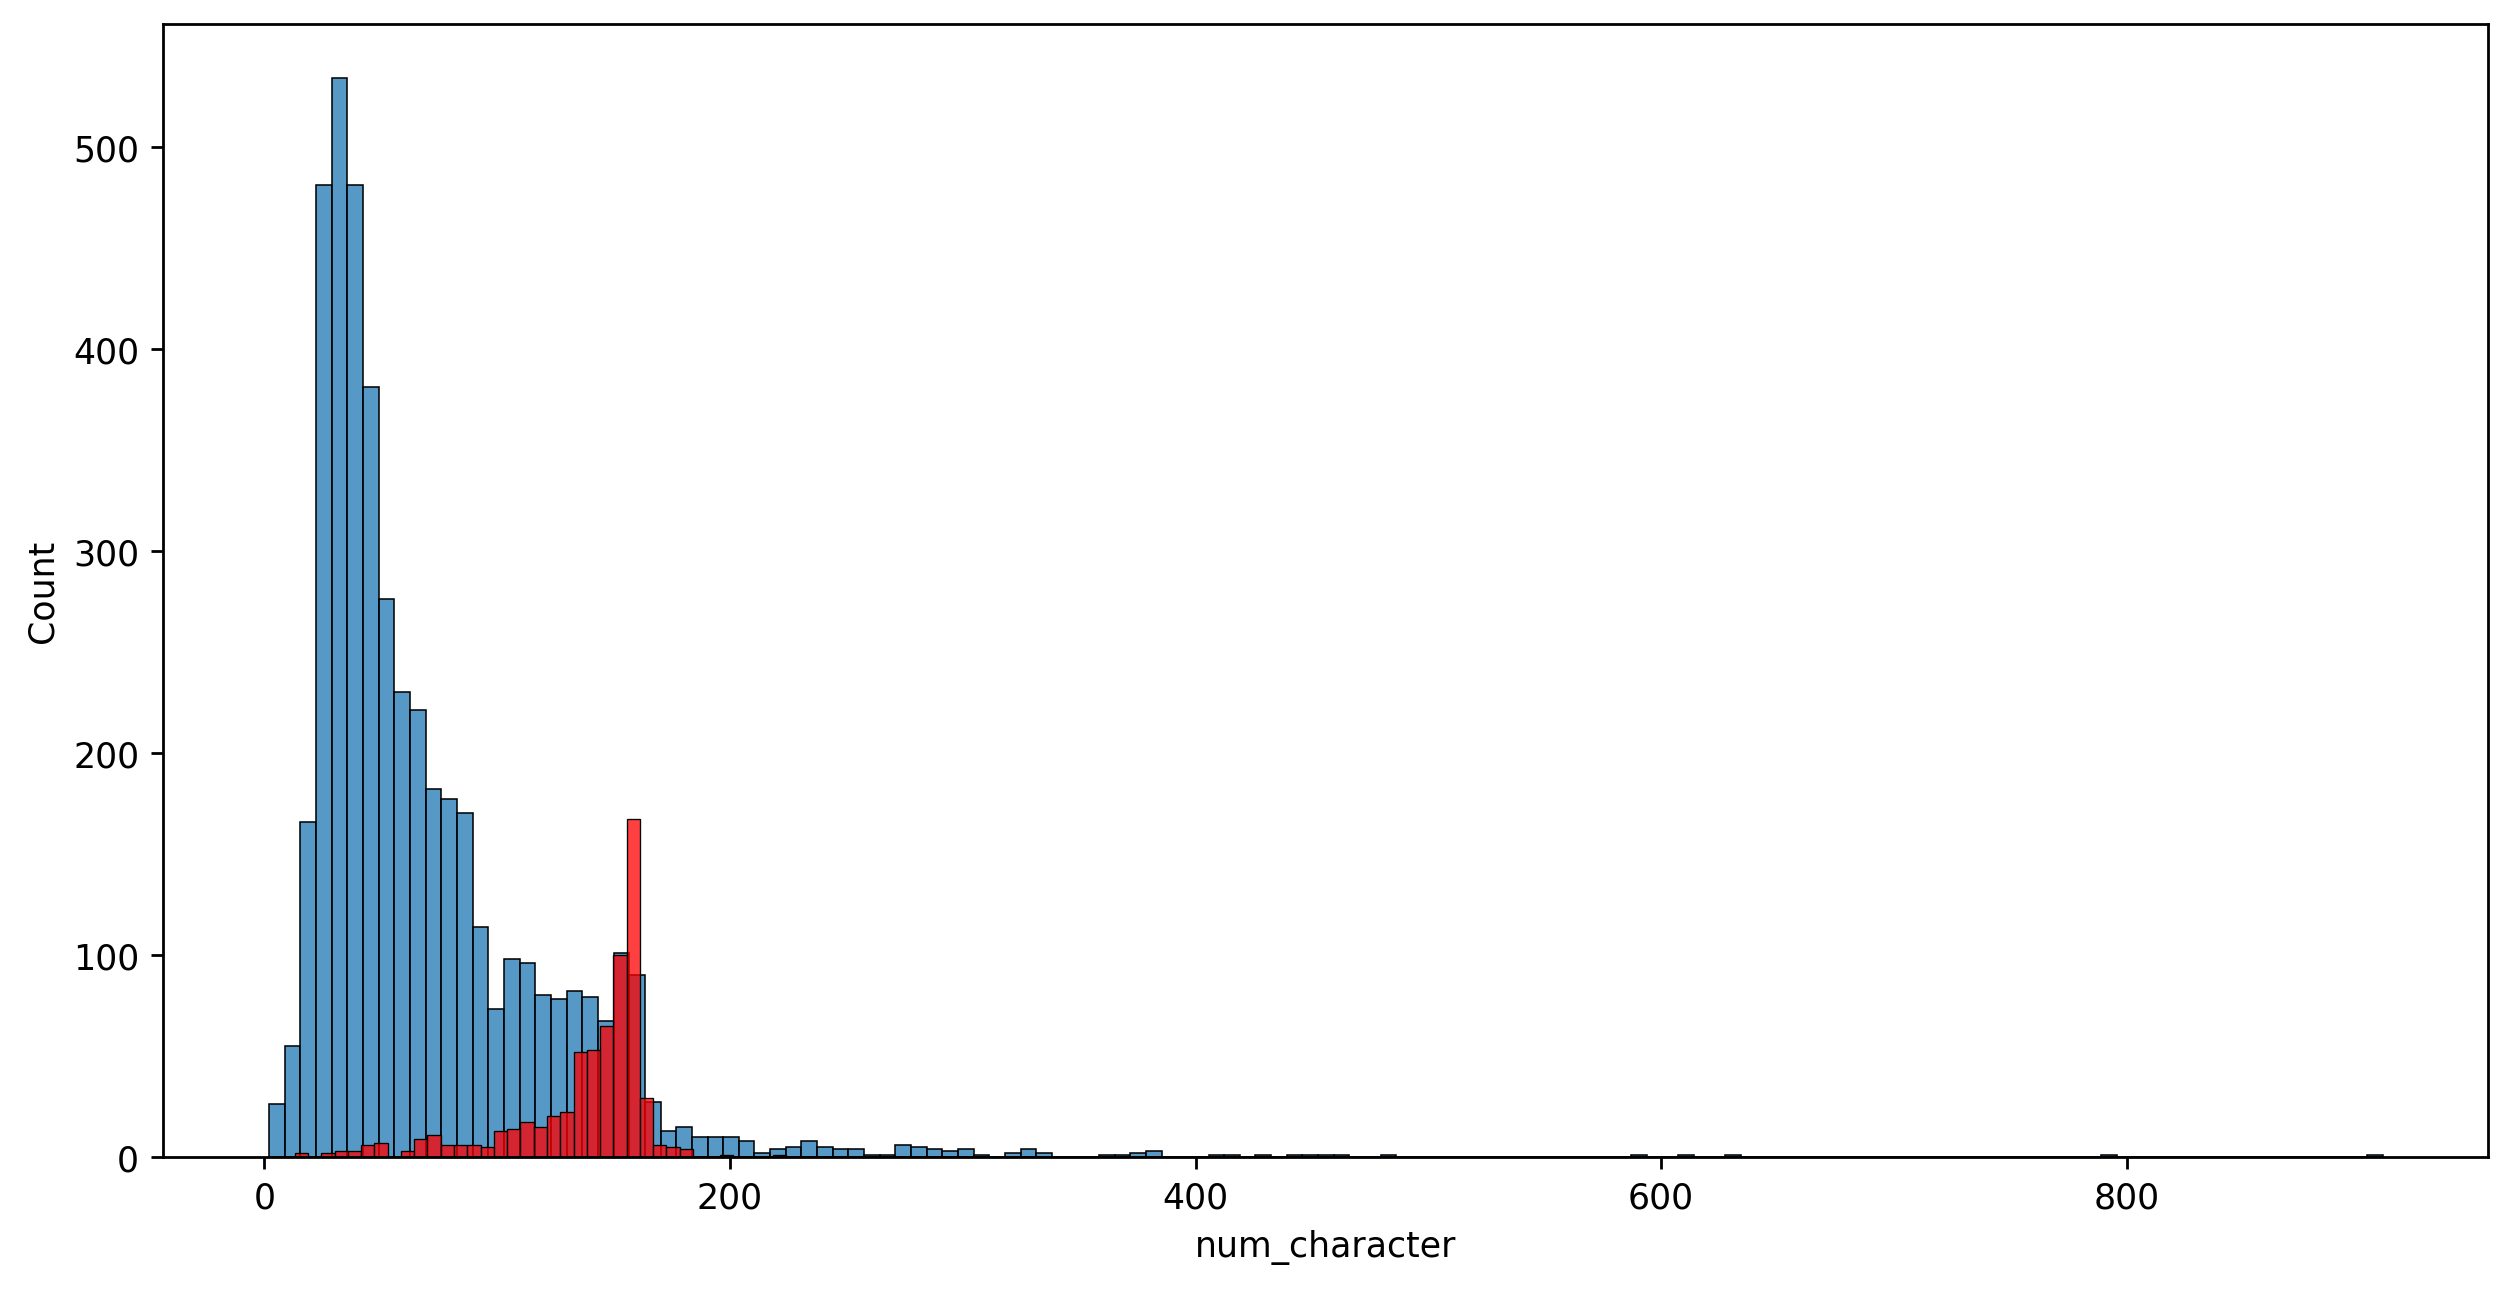

In [32]:
plt.figure(figsize=(12,6), dpi = 250)
sns.histplot(df[df['target'] == 0]['num_character'])
sns.histplot(df[df['target'] == 1]['num_character'],color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

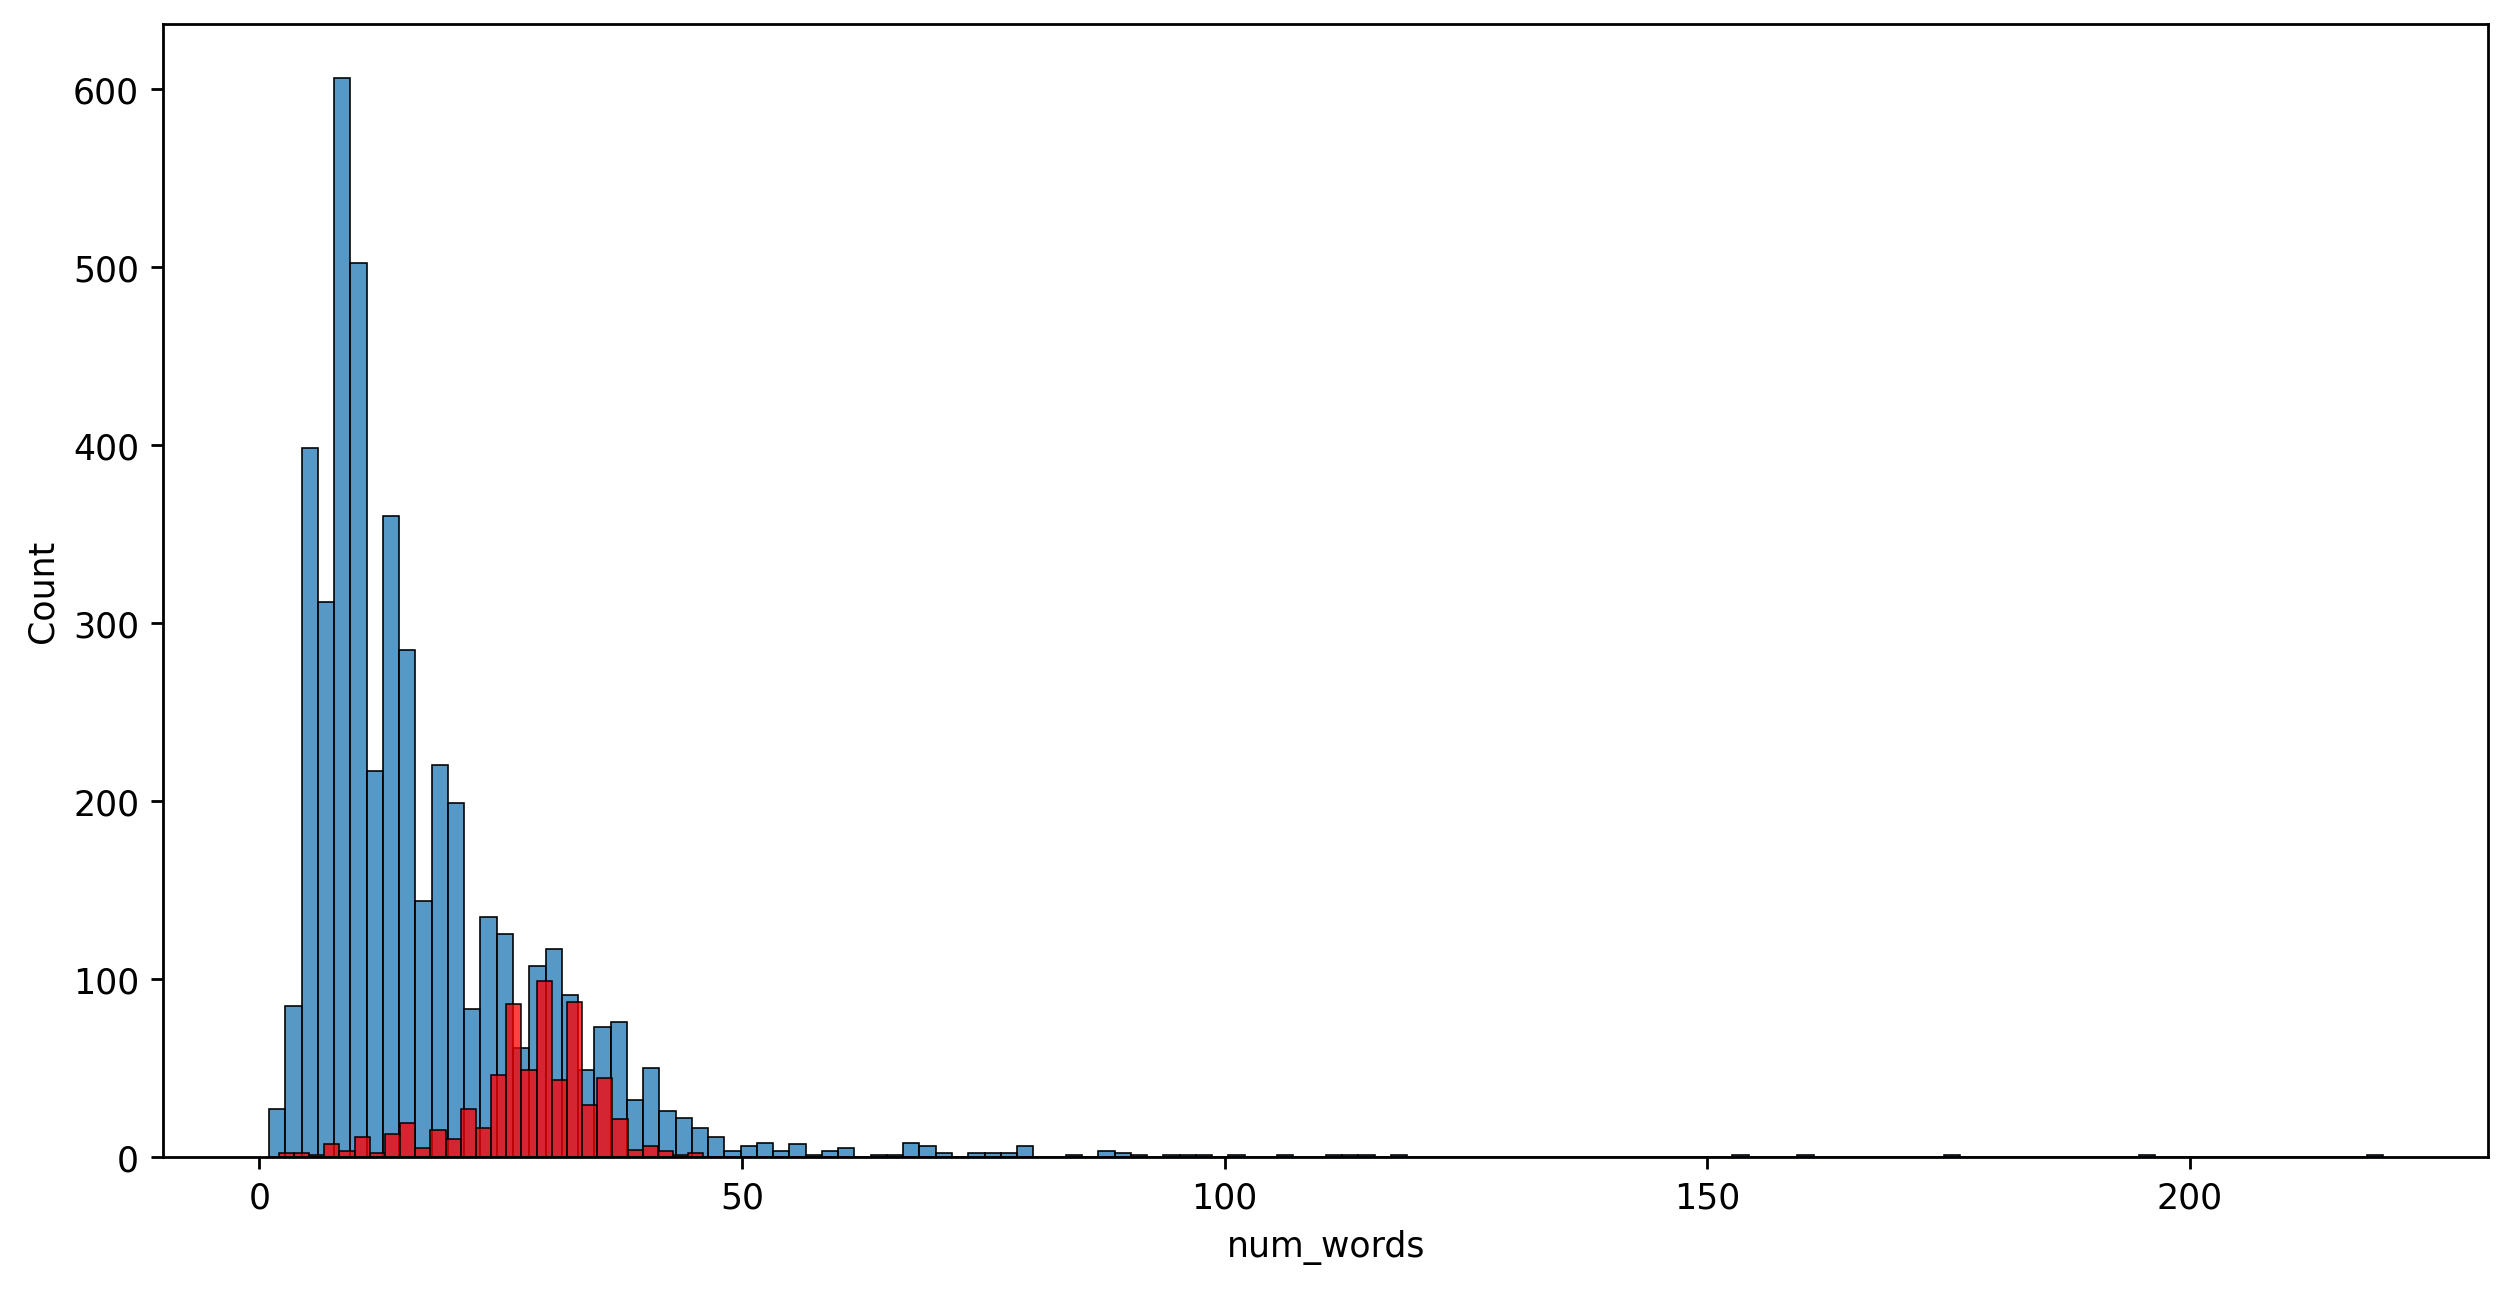

In [33]:
plt.figure(figsize=(12,6), dpi = 250)
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color = 'red')

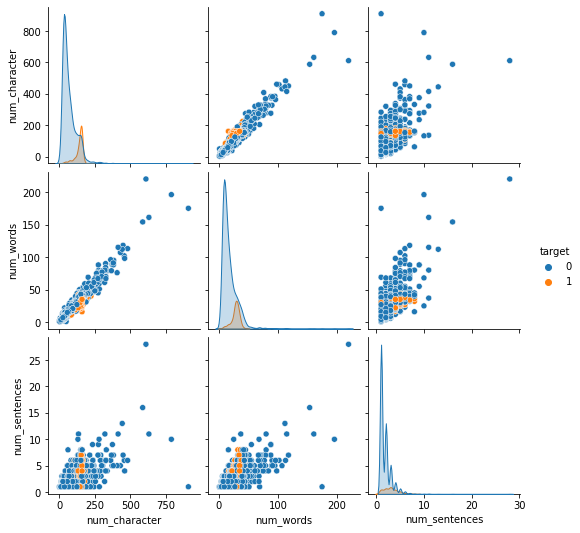

In [34]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

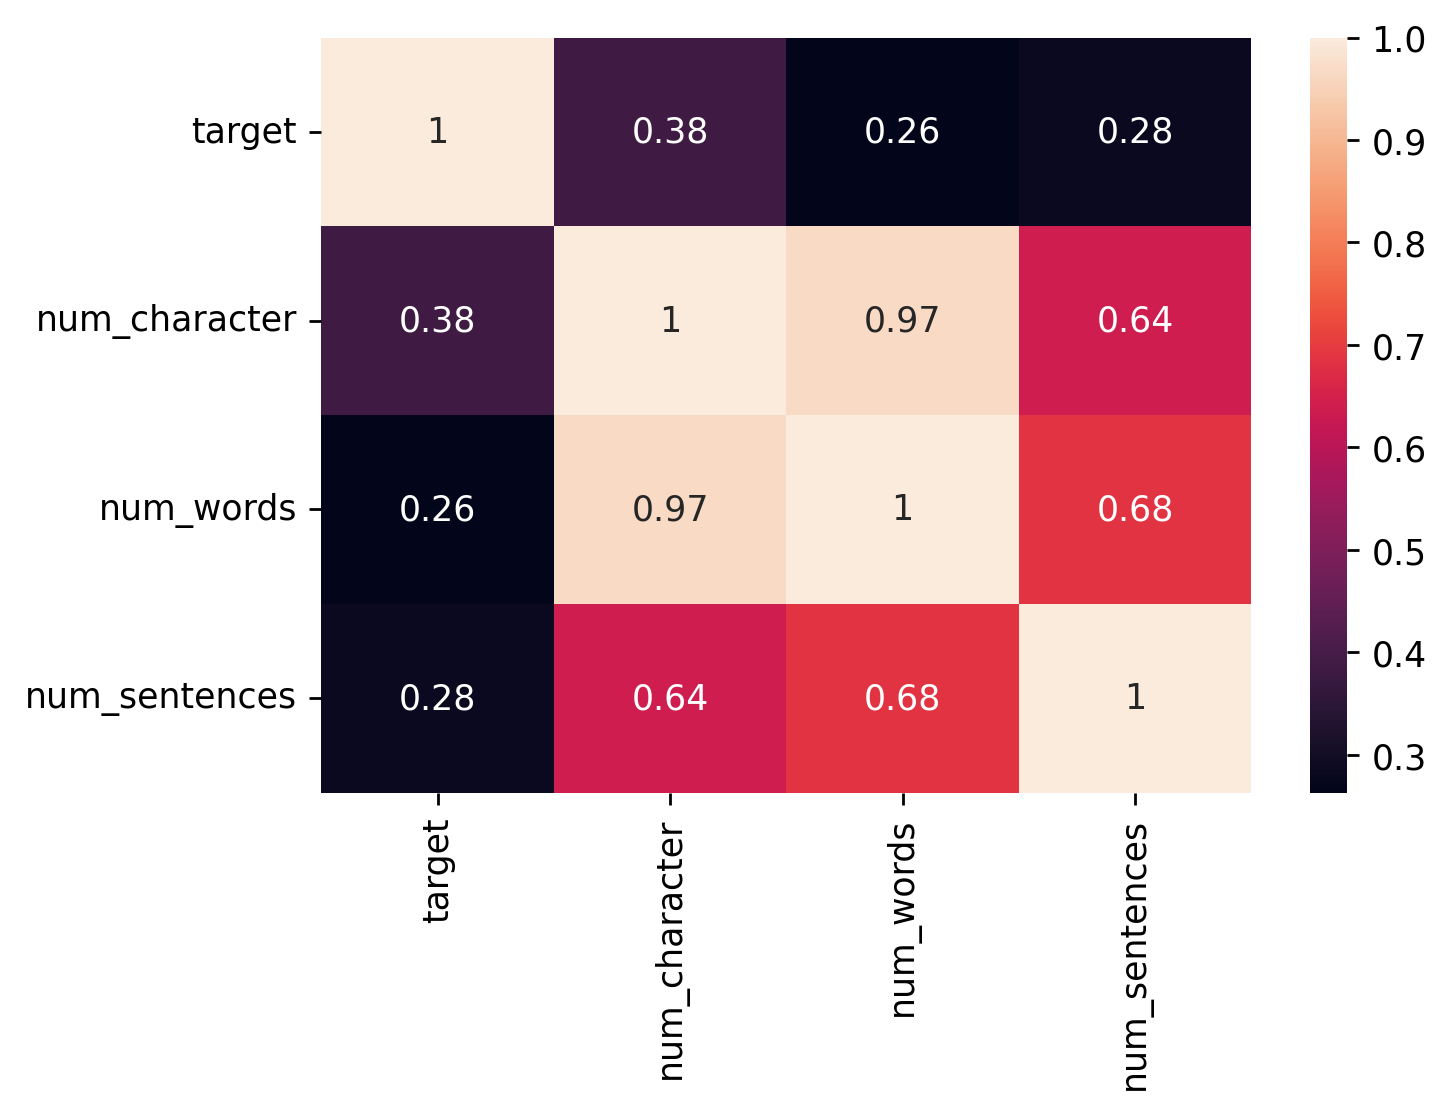

In [35]:
plt.figure( dpi = 250)
sns.heatmap(df.corr(),annot=True)

# Text Preprocessing

In [36]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def tranform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
            text = ps.stem(i)
            y.append(text)
    return " ".join(y)
        

In [37]:
tranform_text("Loan for any purpose å£500 - å£75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'")

'loan purpos homeown tenant welcom previous refus still help call free 0800 1956669 text back'

In [38]:
df['text'][454]

"Loan for any purpose å£500 - å£75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'"

In [39]:
df['transformed_text'] = df['text'].apply(tranform_text)

In [40]:
df.head()

,target,text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
!jupyter kernelspec list


Available kernels:
  local-venv-kernel    C:\Users\hksor\AppData\Roaming\jupyter\kernels\local-venv-kernel
  python3              C:\Users\hksor\AppData\Roaming\jupyter\kernels\python3
  tfod                 C:\Users\hksor\AppData\Roaming\jupyter\kernels\tfod
  tfodj                C:\Users\hksor\AppData\Roaming\jupyter\kernels\tfodj
  wca                  C:\Users\hksor\AppData\Roaming\jupyter\kernels\wca


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size= 10, background_color='white')

In [43]:
spam_wc= wc.generate(df[df['target']== 1]['transformed_text'].str.cat(sep =" "))

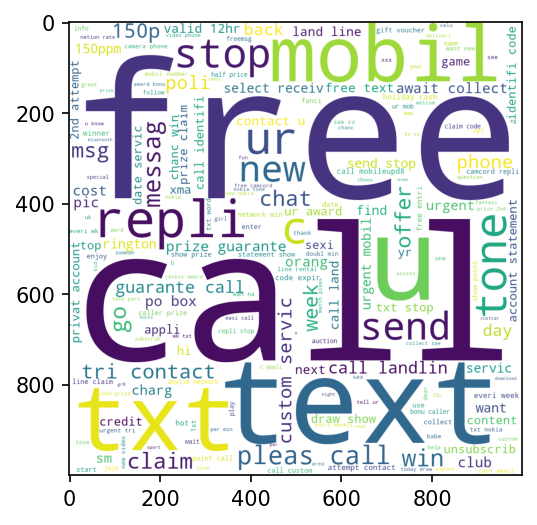

In [44]:
plt.figure( dpi = 150)
plt.imshow(spam_wc)

In [45]:
ham_wc= wc.generate(df[df['target']== 0]['transformed_text'].str.cat(sep =" "))

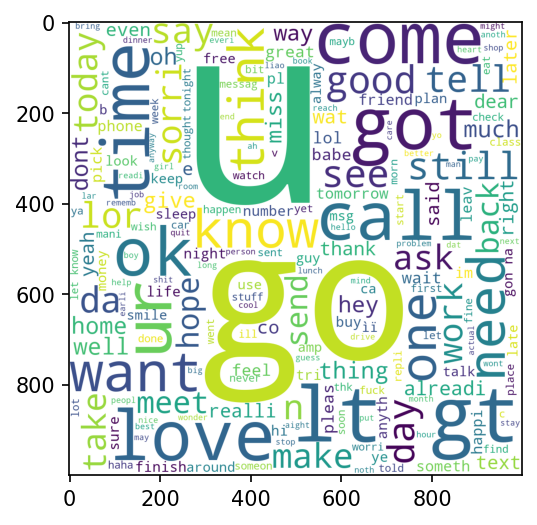

In [46]:
plt.figure( dpi = 150)
plt.imshow(ham_wc)

In [47]:
spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)
        

In [48]:
len(spam_corpus)

9939

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


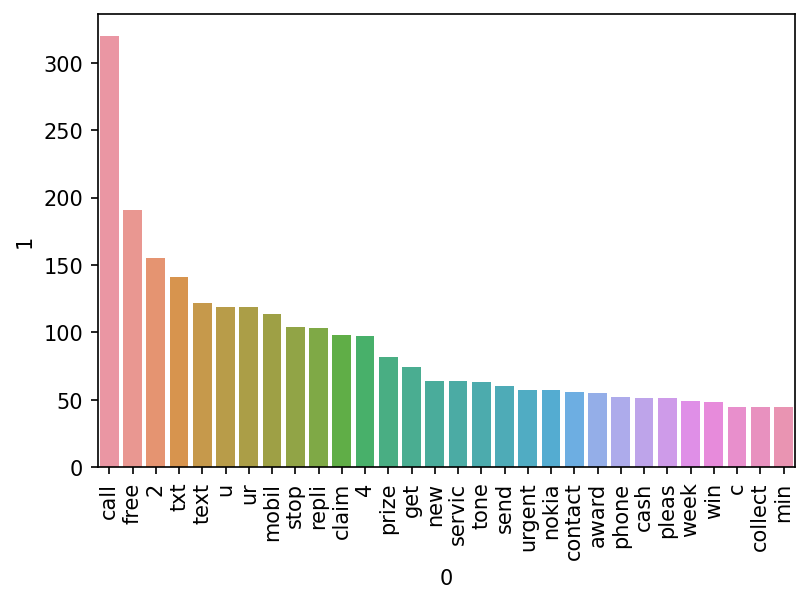

In [49]:
from collections import Counter
plt.figure( dpi = 150)
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [50]:
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35394

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


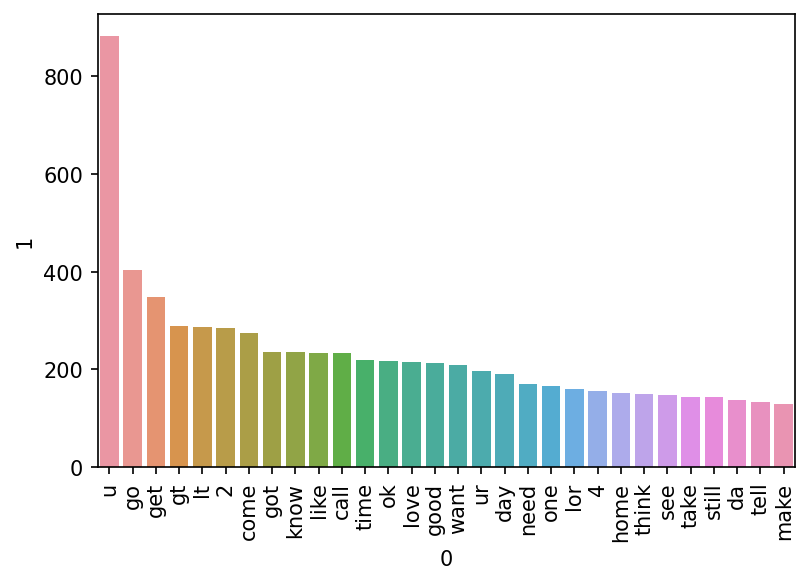

In [52]:
plt.figure( dpi = 150)
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [99]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [140]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [141]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [142]:
X.shape

(5169, 3000)

In [143]:
y = df['target'].values

In [144]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [147]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [148]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [149]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8500967117988395
[[774 131]
 [ 24 105]]
0.4449152542372881


In [150]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[904   1]
 [ 28 101]]
0.9901960784313726


In [151]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[905   0]
 [ 18 111]]
1.0


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [153]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [154]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [155]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [156]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9738878143133463, 0.9811320754716981)

In [157]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
        current_acc,current_pre = train_classifier(clf,x_train,y_train,x_test,y_test)
        print("For", name)
        print("Accuracy: ",current_acc)
        print("Precision: ",current_pre)
        accuracy_scores.append(current_acc)
        precision_scores.append(current_pre)

For SVC
Accuracy:  0.9738878143133463
Precision:  0.9811320754716981
For KN
Accuracy:  0.9187620889748549
Precision:  1.0
For NB
Accuracy:  0.971953578336557
Precision:  0.9901960784313726
For DT
Accuracy:  0.9342359767891683
Precision:  0.8426966292134831
For LR
Accuracy:  0.9593810444874274
Precision:  0.978021978021978
For RF
Accuracy:  0.97678916827853
Precision:  1.0
For AdaBoost
Accuracy:  0.9758220502901354
Precision:  1.0
For BgC
Accuracy:  0.9574468085106383
Precision:  0.8512396694214877
For ETC
Accuracy:  0.9787234042553191
Precision:  0.9734513274336283
For GBDT
Accuracy:  0.9487427466150871
Precision:  0.9318181818181818
For xgb
Accuracy:  0.9729206963249516
Precision:  0.9469026548672567


In [158]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [159]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.918762,1.000000
5,RF,0.976789,1.000000
6,AdaBoost,0.975822,1.000000
2,NB,0.971954,0.990196
0,SVC,0.973888,0.981132
4,LR,0.959381,0.978022
8,ETC,0.978723,0.973451
10,xgb,0.972921,0.946903
9,GBDT,0.948743,0.931818
7,BgC,0.957447,0.851240


In [160]:
# model improvement 


In [161]:
import pickle

In [163]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))